# EX 1

In [1128]:
import pandas as pd
import ssl
import matplotlib.pyplot as plt

In [1129]:
df_EUR_M_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_capitalization.csv')
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_return.csv')
df_EUR_Y_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_capitalization.csv')
df_EUR_Y_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_return.csv')

In [1130]:
#ssl._create_default_https_context = ssl._create_unverified_context
#Import environmental score dataset (excel)
E_index_path = 'https://github.com/GiammarcoBozzelli/SEF/raw/main/ESG_Scores/DS_EScore_Y.xlsx'  # Replace with your Excel file name
df_E = pd.read_excel(E_index_path)

#Import country-to-region dataset (excel)
region_path = 'https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/CountriesToRegions.xlsx'  # Replace with your Excel file name
df_region = pd.read_excel(region_path)

#Let's keep only the EUR countries
df_region.drop(index=[0,1,2,3], inplace= True )
df_EUR = df_region[df_region['Unnamed: 2'] == 'EUR']

#Rename the column so we can merge later
df_EUR = df_EUR.rename(columns={'% AMER: Cnada + USA' : 'ISIN_First2'})

#Create a new column in the E score dataset with only the 2 first characters of the column ISIN
df_E['ISIN_First2'] = df_E['ISIN'].str[:2]

#Merge the E score dataset with the EUR countries dataset
df_E_EUR = pd.merge(df_EUR,  df_E, on='ISIN_First2', how='inner')

#Remove the x in front of the years in the dataset
df_E_EUR.columns = df_E_EUR.columns.str.lstrip('x')

#Keep the years 2008-2022
years_to_drop = [str(year) for year in range(1999, 2008)]
df_E_EUR = df_E_EUR.drop(columns=years_to_drop)


In [1131]:
#Report summary statistics (mean, median, min, max, standard deviation)
summary_stats = df_E_EUR.describe()

In [1132]:
#Take the average E score of firms for each year
Escore_mean = summary_stats.loc['mean']

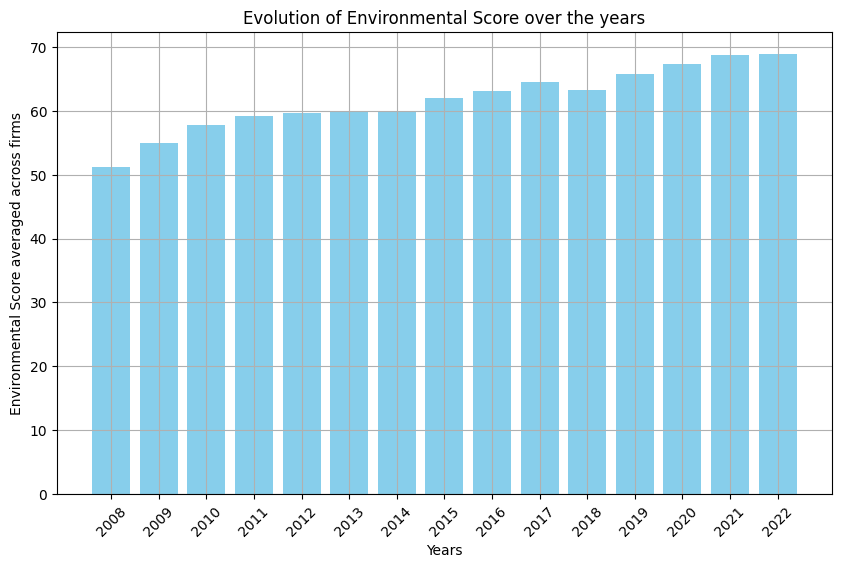

In [1133]:
#Plot the histogram of Average E score over years
plt.figure(figsize=(10, 6))
plt.bar(Escore_mean.index, Escore_mean.values, color='skyblue')
plt.title("Evolution of Environmental Score over the years")
plt.xlabel("Years")
plt.ylabel("Environmental Score averaged across firms")
plt.xticks(rotation=45)  # Rotate the year labels
plt.grid(True)
plt.show()

In [1134]:
df_E_EUR

,ISIN_First2,Unnamed: 1,Unnamed: 2,ISIN,NAME,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AT,AUSTRIA,EUR,AT000000STR1,STRABAG SE,22.87,30.90,44.29,58.66,49.97,50.09,48.69,55.55,56.98,58.49,64.61,62.49,60.42,58.09,56.89
1,AT,AUSTRIA,EUR,AT00000VIE62,FLUGHAFEN WIEN,23.14,31.84,28.27,31.09,30.45,27.17,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,NaN
2,AT,AUSTRIA,EUR,AT0000606306,RAIFFEISEN BANK INTL.,41.52,37.08,66.61,66.05,66.84,68.68,73.75,75.14,82.52,82.94,61.29,63.22,61.36,62.62,61.64
3,AT,AUSTRIA,EUR,AT0000652011,ERSTE GROUP BANK,61.22,74.29,70.81,84.47,83.02,83.81,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91
4,AT,AUSTRIA,EUR,AT0000720008,TELEKOM AUSTRIA,77.76,85.48,78.31,75.08,66.94,71.34,73.61,73.82,62.69,63.56,63.59,64.30,64.79,59.94,59.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,SE,SWEDEN,EUR,SE0016589188,ELECTROLUX B,92.81,90.98,71.95,83.03,67.38,80.68,77.75,76.38,80.69,66.64,66.36,70.94,75.90,81.60,82.91
532,SE,SWEDEN,EUR,SE0017486889,ATLAS COPCO A,75.46,74.50,77.82,86.62,81.26,82.89,79.49,76.71,76.36,79.25,81.45,82.24,84.08,84.56,80.82
533,SE,SWEDEN,EUR,SE0018012494,MODERN TIMES GROUP MTG B,17.14,28.20,32.52,73.90,67.22,67.94,65.88,71.52,68.49,63.17,58.79,64.91,64.91,64.28,65.74
534,SE,SWEDEN,EUR,SE0018012635,WIHLBORGS FASTIGHETER,45.73,54.42,61.85,68.14,63.46,58.63,59.99,72.87,69.28,60.69,57.71,57.71,63.23,58.48,51.34


# EX 2

In [1135]:
#Import the dataset with the weights of the portfolios on the efficient frontier
df_weights = pd.read_csv('https://github.com/BalthazazarDuc/SEF-HW2/raw/main/Homework_1/df_weights_high.csv')

In [1136]:
df_weights.drop(columns = 'Unnamed: 0', inplace=True)
df_weights

,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,HOLMEN B,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
0,0.000000e+00,8.872289e-17,0.000000e+00,3.549634e-17,0.000000e+00,4.362439e-17,0.000000e+00,0.000000e+00,5.093352e-17,6.266565e-17,...,7.002968e-18,0.000000e+00,6.034762e-17,2.277548e-17,1.407690e-04,3.338352e-17,0.000000e+00,2.538171e-17,0.000000e+00,1.120590e-18
1,6.136834e-17,0.000000e+00,1.394676e-17,1.366048e-16,4.387640e-17,0.000000e+00,1.005252e-17,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.265141e-17,0.000000e+00,3.349949e-17,1.195960e-02,2.679044e-17,0.000000e+00,0.000000e+00,2.017853e-17,1.376478e-17
2,0.000000e+00,0.000000e+00,2.095121e-17,0.000000e+00,0.000000e+00,7.020669e-18,2.977913e-17,6.564989e-18,1.024373e-16,0.000000e+00,...,0.000000e+00,0.000000e+00,5.974674e-18,3.264025e-18,2.412237e-02,3.968733e-17,0.000000e+00,7.962347e-18,0.000000e+00,0.000000e+00
3,1.324448e-16,0.000000e+00,4.622819e-17,2.637891e-17,9.873813e-17,0.000000e+00,7.307171e-17,0.000000e+00,0.000000e+00,6.161219e-18,...,0.000000e+00,3.038617e-17,0.000000e+00,2.305140e-17,3.320636e-02,5.159401e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,3.431061e-17,0.000000e+00,0.000000e+00,0.000000e+00,4.525084e-17,7.926075e-17,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.951658e-17,1.918548e-17,3.087290e-17,4.007141e-02,2.107503e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,6.209203e-17,1.188318e-17,1.226528e-16,4.211966e-17,0.000000e+00,4.060213e-17,0.000000e+00,2.647173e-17,7.744890e-17,0.000000e+00,...,0.000000e+00,6.952877e-17,0.000000e+00,4.343533e-17,4.608736e-02,2.941015e-17,0.000000e+00,0.000000e+00,8.657496e-18,1.856554e-17
6,7.589819e-17,2.964280e-17,0.000000e+00,3.857613e-17,9.383582e-17,1.884122e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,7.868290e-18,0.000000e+00,4.995627e-02,3.178956e-17,7.006518e-18,0.000000e+00,4.192958e-17,5.457691e-17
7,1.672429e-16,0.000000e+00,3.154001e-18,0.000000e+00,1.855945e-16,0.000000e+00,0.000000e+00,0.000000e+00,1.621875e-16,0.000000e+00,...,0.000000e+00,0.000000e+00,2.811920e-17,0.000000e+00,5.741269e-02,5.107542e-17,2.732058e-17,7.619632e-19,0.000000e+00,4.186290e-17
8,0.000000e+00,0.000000e+00,3.032372e-17,0.000000e+00,1.592481e-17,2.778598e-17,7.306229e-17,0.000000e+00,1.254416e-16,1.461006e-17,...,4.340732e-17,0.000000e+00,0.000000e+00,0.000000e+00,6.290304e-02,2.579133e-17,0.000000e+00,0.000000e+00,6.836664e-17,0.000000e+00
9,4.753518e-17,1.275351e-16,3.576821e-17,3.438268e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.070836e-17,8.931688e-18,2.919880e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,6.782455e-18,5.944139e-02,1.321110e-18,7.751663e-18,4.648201e-17,0.000000e+00,3.174928e-17


In [1137]:
#Transpose the dataframe with the weights
df_weights_T = df_weights.T
df_weights_T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
FLUGHAFEN WIEN,0.000000e+00,6.136834e-17,0.000000e+00,1.324448e-16,0.000000e+00,6.209203e-17,7.589819e-17,1.672429e-16,0.000000e+00,4.753518e-17,...,2.916762e-18,0.000000e+00,0.000000e+00,1.056363e-17,2.553383e-16,2.604870e-16,4.678997e-17,4.893006e-16,0.000000e+00,8.475369e-16
ERSTE GROUP BANK,8.872289e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.431061e-17,1.188318e-17,2.964280e-17,0.000000e+00,0.000000e+00,1.275351e-16,...,0.000000e+00,0.000000e+00,1.511762e-16,1.818553e-16,2.284325e-16,3.162876e-16,5.928798e-16,0.000000e+00,2.234324e-15,0.000000e+00
OMV,0.000000e+00,1.394676e-17,2.095121e-17,4.622819e-17,0.000000e+00,1.226528e-16,0.000000e+00,3.154001e-18,3.032372e-17,3.576821e-17,...,8.498561e-17,0.000000e+00,8.880037e-17,7.535961e-18,0.000000e+00,0.000000e+00,1.296353e-19,0.000000e+00,1.223414e-15,3.475209e-16
VERBUND,3.549634e-17,1.366048e-16,0.000000e+00,2.637891e-17,0.000000e+00,4.211966e-17,3.857613e-17,0.000000e+00,0.000000e+00,3.438268e-17,...,1.469290e-17,6.320869e-17,0.000000e+00,0.000000e+00,2.978850e-17,7.787751e-17,6.981631e-17,0.000000e+00,0.000000e+00,3.394525e-18
WIENERBERGER,0.000000e+00,4.387640e-17,0.000000e+00,9.873813e-17,0.000000e+00,0.000000e+00,9.383582e-17,1.855945e-16,1.592481e-17,0.000000e+00,...,0.000000e+00,0.000000e+00,2.121521e-17,0.000000e+00,5.297572e-16,2.658510e-17,1.919191e-16,0.000000e+00,4.115631e-16,4.212787e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,3.338352e-17,2.679044e-17,3.968733e-17,5.159401e-19,2.107503e-17,2.941015e-17,3.178956e-17,5.107542e-17,2.579133e-17,1.321110e-18,...,7.515231e-17,0.000000e+00,0.000000e+00,4.817509e-16,3.921142e-16,0.000000e+00,2.391691e-16,0.000000e+00,3.400058e-16,4.576100e-17
ELECTROLUX B,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.006518e-18,2.732058e-17,0.000000e+00,7.751663e-18,...,0.000000e+00,0.000000e+00,0.000000e+00,6.757230e-17,5.512061e-17,0.000000e+00,0.000000e+00,2.202747e-16,1.386478e-15,0.000000e+00
ATLAS COPCO A,2.538171e-17,0.000000e+00,7.962347e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.619632e-19,0.000000e+00,4.648201e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,3.291077e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.579416e-16
MODERN TIMES GROUP MTG B,0.000000e+00,2.017853e-17,0.000000e+00,0.000000e+00,0.000000e+00,8.657496e-18,4.192958e-17,0.000000e+00,6.836664e-17,0.000000e+00,...,0.000000e+00,1.532860e-16,1.373970e-17,0.000000e+00,0.000000e+00,4.377388e-17,0.000000e+00,0.000000e+00,3.018853e-15,0.000000e+00


In [1138]:
#Create a column with the names of the firms
df_weights_T['NAME'] = df_weights_T.index
df_weights_T

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,NAME
FLUGHAFEN WIEN,0.000000e+00,6.136834e-17,0.000000e+00,1.324448e-16,0.000000e+00,6.209203e-17,7.589819e-17,1.672429e-16,0.000000e+00,4.753518e-17,...,0.000000e+00,0.000000e+00,1.056363e-17,2.553383e-16,2.604870e-16,4.678997e-17,4.893006e-16,0.000000e+00,8.475369e-16,FLUGHAFEN WIEN
ERSTE GROUP BANK,8.872289e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.431061e-17,1.188318e-17,2.964280e-17,0.000000e+00,0.000000e+00,1.275351e-16,...,0.000000e+00,1.511762e-16,1.818553e-16,2.284325e-16,3.162876e-16,5.928798e-16,0.000000e+00,2.234324e-15,0.000000e+00,ERSTE GROUP BANK
OMV,0.000000e+00,1.394676e-17,2.095121e-17,4.622819e-17,0.000000e+00,1.226528e-16,0.000000e+00,3.154001e-18,3.032372e-17,3.576821e-17,...,0.000000e+00,8.880037e-17,7.535961e-18,0.000000e+00,0.000000e+00,1.296353e-19,0.000000e+00,1.223414e-15,3.475209e-16,OMV
VERBUND,3.549634e-17,1.366048e-16,0.000000e+00,2.637891e-17,0.000000e+00,4.211966e-17,3.857613e-17,0.000000e+00,0.000000e+00,3.438268e-17,...,6.320869e-17,0.000000e+00,0.000000e+00,2.978850e-17,7.787751e-17,6.981631e-17,0.000000e+00,0.000000e+00,3.394525e-18,VERBUND
WIENERBERGER,0.000000e+00,4.387640e-17,0.000000e+00,9.873813e-17,0.000000e+00,0.000000e+00,9.383582e-17,1.855945e-16,1.592481e-17,0.000000e+00,...,0.000000e+00,2.121521e-17,0.000000e+00,5.297572e-16,2.658510e-17,1.919191e-16,0.000000e+00,4.115631e-16,4.212787e-16,WIENERBERGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,3.338352e-17,2.679044e-17,3.968733e-17,5.159401e-19,2.107503e-17,2.941015e-17,3.178956e-17,5.107542e-17,2.579133e-17,1.321110e-18,...,0.000000e+00,0.000000e+00,4.817509e-16,3.921142e-16,0.000000e+00,2.391691e-16,0.000000e+00,3.400058e-16,4.576100e-17,HEXAGON B
ELECTROLUX B,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.006518e-18,2.732058e-17,0.000000e+00,7.751663e-18,...,0.000000e+00,0.000000e+00,6.757230e-17,5.512061e-17,0.000000e+00,0.000000e+00,2.202747e-16,1.386478e-15,0.000000e+00,ELECTROLUX B
ATLAS COPCO A,2.538171e-17,0.000000e+00,7.962347e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.619632e-19,0.000000e+00,4.648201e-17,...,0.000000e+00,0.000000e+00,3.291077e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.579416e-16,ATLAS COPCO A
MODERN TIMES GROUP MTG B,0.000000e+00,2.017853e-17,0.000000e+00,0.000000e+00,0.000000e+00,8.657496e-18,4.192958e-17,0.000000e+00,6.836664e-17,0.000000e+00,...,1.532860e-16,1.373970e-17,0.000000e+00,0.000000e+00,4.377388e-17,0.000000e+00,0.000000e+00,3.018853e-15,0.000000e+00,MODERN TIMES GROUP MTG B


In [1139]:
#Set the firms names as index
df_E_EUR_2 = df_E_EUR.set_index('NAME')
df_E_EUR_2

,ISIN_First2,Unnamed: 1,Unnamed: 2,ISIN,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
NAME,,,,,,,,,,,,,,,,,,,
STRABAG SE,AT,AUSTRIA,EUR,AT000000STR1,22.87,30.90,44.29,58.66,49.97,50.09,48.69,55.55,56.98,58.49,64.61,62.49,60.42,58.09,56.89
FLUGHAFEN WIEN,AT,AUSTRIA,EUR,AT00000VIE62,23.14,31.84,28.27,31.09,30.45,27.17,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,NaN
RAIFFEISEN BANK INTL.,AT,AUSTRIA,EUR,AT0000606306,41.52,37.08,66.61,66.05,66.84,68.68,73.75,75.14,82.52,82.94,61.29,63.22,61.36,62.62,61.64
ERSTE GROUP BANK,AT,AUSTRIA,EUR,AT0000652011,61.22,74.29,70.81,84.47,83.02,83.81,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91
TELEKOM AUSTRIA,AT,AUSTRIA,EUR,AT0000720008,77.76,85.48,78.31,75.08,66.94,71.34,73.61,73.82,62.69,63.56,63.59,64.30,64.79,59.94,59.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ELECTROLUX B,SE,SWEDEN,EUR,SE0016589188,92.81,90.98,71.95,83.03,67.38,80.68,77.75,76.38,80.69,66.64,66.36,70.94,75.90,81.60,82.91
ATLAS COPCO A,SE,SWEDEN,EUR,SE0017486889,75.46,74.50,77.82,86.62,81.26,82.89,79.49,76.71,76.36,79.25,81.45,82.24,84.08,84.56,80.82
MODERN TIMES GROUP MTG B,SE,SWEDEN,EUR,SE0018012494,17.14,28.20,32.52,73.90,67.22,67.94,65.88,71.52,68.49,63.17,58.79,64.91,64.91,64.28,65.74


In [1140]:
#Drop the unecessary columns
columns_to_drop = ['ISIN_First2', 'Unnamed: 1', 'Unnamed: 2', 'ISIN']

df_E_EUR_2.drop(columns = columns_to_drop, inplace=True)

In [1141]:
#Compute the average E score for each firm across years 2008-2022
df_E_EUR_2['EScore Mean'] = df_E_EUR_2.mean(axis=1)

In [1142]:
df_E_EUR_2

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,EScore Mean
NAME,,,,,,,,,,,,,,,,
STRABAG SE,22.87,30.90,44.29,58.66,49.97,50.09,48.69,55.55,56.98,58.49,64.61,62.49,60.42,58.09,56.89,51.932667
FLUGHAFEN WIEN,23.14,31.84,28.27,31.09,30.45,27.17,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,NaN,49.007857
RAIFFEISEN BANK INTL.,41.52,37.08,66.61,66.05,66.84,68.68,73.75,75.14,82.52,82.94,61.29,63.22,61.36,62.62,61.64,64.750667
ERSTE GROUP BANK,61.22,74.29,70.81,84.47,83.02,83.81,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91,79.015333
TELEKOM AUSTRIA,77.76,85.48,78.31,75.08,66.94,71.34,73.61,73.82,62.69,63.56,63.59,64.30,64.79,59.94,59.80,69.400667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ELECTROLUX B,92.81,90.98,71.95,83.03,67.38,80.68,77.75,76.38,80.69,66.64,66.36,70.94,75.90,81.60,82.91,77.733333
ATLAS COPCO A,75.46,74.50,77.82,86.62,81.26,82.89,79.49,76.71,76.36,79.25,81.45,82.24,84.08,84.56,80.82,80.234000
MODERN TIMES GROUP MTG B,17.14,28.20,32.52,73.90,67.22,67.94,65.88,71.52,68.49,63.17,58.79,64.91,64.91,64.28,65.74,58.307333


In [1143]:
#Create a dataframe with only the name of the firms and the average EScore for each firm
df_EScore_mean = df_E_EUR_2.loc[:, ['EScore Mean']]
df_EScore_mean

,EScore Mean
NAME,
STRABAG SE,51.932667
FLUGHAFEN WIEN,49.007857
RAIFFEISEN BANK INTL.,64.750667
ERSTE GROUP BANK,79.015333
TELEKOM AUSTRIA,69.400667
...,...
ELECTROLUX B,77.733333
ATLAS COPCO A,80.234000
MODERN TIMES GROUP MTG B,58.307333


In [1144]:
#Merge the 2 datasets
df_E_weights = pd.merge(df_EScore_mean, df_weights_T, on = 'NAME', how='inner')
df_E_weights

,NAME,EScore Mean,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,FLUGHAFEN WIEN,49.007857,0.000000e+00,6.136834e-17,0.000000e+00,1.324448e-16,0.000000e+00,6.209203e-17,7.589819e-17,1.672429e-16,...,2.916762e-18,0.000000e+00,0.000000e+00,1.056363e-17,2.553383e-16,2.604870e-16,4.678997e-17,4.893006e-16,0.000000e+00,8.475369e-16
1,ERSTE GROUP BANK,79.015333,8.872289e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.431061e-17,1.188318e-17,2.964280e-17,0.000000e+00,...,0.000000e+00,0.000000e+00,1.511762e-16,1.818553e-16,2.284325e-16,3.162876e-16,5.928798e-16,0.000000e+00,2.234324e-15,0.000000e+00
2,OMV,67.852667,0.000000e+00,1.394676e-17,2.095121e-17,4.622819e-17,0.000000e+00,1.226528e-16,0.000000e+00,3.154001e-18,...,8.498561e-17,0.000000e+00,8.880037e-17,7.535961e-18,0.000000e+00,0.000000e+00,1.296353e-19,0.000000e+00,1.223414e-15,3.475209e-16
3,VERBUND,83.282000,3.549634e-17,1.366048e-16,0.000000e+00,2.637891e-17,0.000000e+00,4.211966e-17,3.857613e-17,0.000000e+00,...,1.469290e-17,6.320869e-17,0.000000e+00,0.000000e+00,2.978850e-17,7.787751e-17,6.981631e-17,0.000000e+00,0.000000e+00,3.394525e-18
4,WIENERBERGER,68.854667,0.000000e+00,4.387640e-17,0.000000e+00,9.873813e-17,0.000000e+00,0.000000e+00,9.383582e-17,1.855945e-16,...,0.000000e+00,0.000000e+00,2.121521e-17,0.000000e+00,5.297572e-16,2.658510e-17,1.919191e-16,0.000000e+00,4.115631e-16,4.212787e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,HEXAGON B,34.834667,3.338352e-17,2.679044e-17,3.968733e-17,5.159401e-19,2.107503e-17,2.941015e-17,3.178956e-17,5.107542e-17,...,7.515231e-17,0.000000e+00,0.000000e+00,4.817509e-16,3.921142e-16,0.000000e+00,2.391691e-16,0.000000e+00,3.400058e-16,4.576100e-17
419,ELECTROLUX B,77.733333,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.006518e-18,2.732058e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,6.757230e-17,5.512061e-17,0.000000e+00,0.000000e+00,2.202747e-16,1.386478e-15,0.000000e+00
420,ATLAS COPCO A,80.234000,2.538171e-17,0.000000e+00,7.962347e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.619632e-19,...,0.000000e+00,0.000000e+00,0.000000e+00,3.291077e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.579416e-16
421,MODERN TIMES GROUP MTG B,58.307333,0.000000e+00,2.017853e-17,0.000000e+00,0.000000e+00,0.000000e+00,8.657496e-18,4.192958e-17,0.000000e+00,...,0.000000e+00,1.532860e-16,1.373970e-17,0.000000e+00,0.000000e+00,4.377388e-17,0.000000e+00,0.000000e+00,3.018853e-15,0.000000e+00


In [1145]:
#Set the firms names as index
df_E_weights.set_index('NAME', inplace=True)

In [1146]:
df_E_weights

,EScore Mean,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,49.007857,0.000000e+00,6.136834e-17,0.000000e+00,1.324448e-16,0.000000e+00,6.209203e-17,7.589819e-17,1.672429e-16,0.000000e+00,...,2.916762e-18,0.000000e+00,0.000000e+00,1.056363e-17,2.553383e-16,2.604870e-16,4.678997e-17,4.893006e-16,0.000000e+00,8.475369e-16
ERSTE GROUP BANK,79.015333,8.872289e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.431061e-17,1.188318e-17,2.964280e-17,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.511762e-16,1.818553e-16,2.284325e-16,3.162876e-16,5.928798e-16,0.000000e+00,2.234324e-15,0.000000e+00
OMV,67.852667,0.000000e+00,1.394676e-17,2.095121e-17,4.622819e-17,0.000000e+00,1.226528e-16,0.000000e+00,3.154001e-18,3.032372e-17,...,8.498561e-17,0.000000e+00,8.880037e-17,7.535961e-18,0.000000e+00,0.000000e+00,1.296353e-19,0.000000e+00,1.223414e-15,3.475209e-16
VERBUND,83.282000,3.549634e-17,1.366048e-16,0.000000e+00,2.637891e-17,0.000000e+00,4.211966e-17,3.857613e-17,0.000000e+00,0.000000e+00,...,1.469290e-17,6.320869e-17,0.000000e+00,0.000000e+00,2.978850e-17,7.787751e-17,6.981631e-17,0.000000e+00,0.000000e+00,3.394525e-18
WIENERBERGER,68.854667,0.000000e+00,4.387640e-17,0.000000e+00,9.873813e-17,0.000000e+00,0.000000e+00,9.383582e-17,1.855945e-16,1.592481e-17,...,0.000000e+00,0.000000e+00,2.121521e-17,0.000000e+00,5.297572e-16,2.658510e-17,1.919191e-16,0.000000e+00,4.115631e-16,4.212787e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,34.834667,3.338352e-17,2.679044e-17,3.968733e-17,5.159401e-19,2.107503e-17,2.941015e-17,3.178956e-17,5.107542e-17,2.579133e-17,...,7.515231e-17,0.000000e+00,0.000000e+00,4.817509e-16,3.921142e-16,0.000000e+00,2.391691e-16,0.000000e+00,3.400058e-16,4.576100e-17
ELECTROLUX B,77.733333,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.006518e-18,2.732058e-17,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,6.757230e-17,5.512061e-17,0.000000e+00,0.000000e+00,2.202747e-16,1.386478e-15,0.000000e+00
ATLAS COPCO A,80.234000,2.538171e-17,0.000000e+00,7.962347e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.619632e-19,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,3.291077e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.579416e-16


In [1147]:
#Multiply each column (except the 1st) by the first EScore Mean column
df_E_weights.iloc[:, 1:] = df_E_weights.iloc[:, 1:].mul(df_E_weights.iloc[:, 0], axis=0)

In [1148]:
df_E_weights

,EScore Mean,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,49.007857,0.000000e+00,3.007531e-15,0.000000e+00,6.490836e-15,0.000000e+00,3.042997e-15,3.719608e-15,8.196216e-15,0.000000e+00,...,1.429442e-16,0.000000e+00,0.000000e+00,5.177007e-16,1.251358e-14,1.276591e-14,2.293076e-15,2.397958e-14,0.000000e+00,4.153597e-14
ERSTE GROUP BANK,79.015333,7.010468e-15,0.000000e+00,0.000000e+00,0.000000e+00,2.711064e-15,9.389532e-16,2.342236e-15,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.194524e-14,1.436936e-14,1.804967e-14,2.499157e-14,4.684660e-14,0.000000e+00,1.765458e-13,0.000000e+00
OMV,67.852667,0.000000e+00,9.463252e-16,1.421596e-15,3.136706e-15,0.000000e+00,8.322319e-15,0.000000e+00,2.140074e-16,2.057546e-15,...,5.766500e-15,0.000000e+00,6.025342e-15,5.113350e-16,0.000000e+00,0.000000e+00,8.796100e-18,0.000000e+00,8.301188e-14,2.358022e-14
VERBUND,83.282000,2.956206e-15,1.137672e-14,0.000000e+00,2.196889e-15,0.000000e+00,3.507810e-15,3.212698e-15,0.000000e+00,0.000000e+00,...,1.223654e-15,5.264146e-15,0.000000e+00,0.000000e+00,2.480846e-15,6.485795e-15,5.814442e-15,0.000000e+00,0.000000e+00,2.827028e-16
WIENERBERGER,68.854667,0.000000e+00,3.021095e-15,0.000000e+00,6.798581e-15,0.000000e+00,0.000000e+00,6.461034e-15,1.277905e-14,1.096498e-15,...,0.000000e+00,0.000000e+00,1.460766e-15,0.000000e+00,3.647626e-14,1.830508e-15,1.321453e-14,0.000000e+00,2.833804e-14,2.900700e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,34.834667,1.162904e-15,9.332359e-16,1.382495e-15,1.797260e-17,7.341416e-16,1.024493e-15,1.107379e-15,1.779195e-15,8.984325e-16,...,2.617906e-15,0.000000e+00,0.000000e+00,1.678163e-14,1.365917e-14,0.000000e+00,8.331377e-15,0.000000e+00,1.184399e-14,1.594069e-15
ELECTROLUX B,77.733333,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.446400e-16,2.123720e-15,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,5.252620e-15,4.284709e-15,0.000000e+00,0.000000e+00,1.712269e-14,1.077755e-13,0.000000e+00
ATLAS COPCO A,80.234000,2.036476e-15,0.000000e+00,6.388509e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.113535e-17,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.640563e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.674249e-14


In [1149]:
#Get the weighted-average E score of each portfolio

#Keep all columns except the first one
cols_to_sum = df_E_weights.columns[1:]

#Compute the sum for all kept columns
weighted_avrg_EScore = df_E_weights[cols_to_sum].sum(axis=0)
weighted_avrg_EScore

0     62.757025
1     62.893829
2     63.107097
3     63.331247
4     62.981591
5     62.392075
6     62.088529
7     61.244678
8     59.020276
9     57.291453
10    55.913819
11    54.761475
12    53.636607
13    52.901904
14    52.981691
15    53.208742
16    52.838318
17    51.655345
18    48.731154
19    46.122575
20    43.583888
21    40.495937
22    34.403174
23    27.148586
24    19.894000
dtype: float64

In [1150]:
#Find the 10 firms with the lowest E score averaged over 2008-2022
df_E_EUR

,ISIN_First2,Unnamed: 1,Unnamed: 2,ISIN,NAME,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AT,AUSTRIA,EUR,AT000000STR1,STRABAG SE,22.87,30.90,44.29,58.66,49.97,50.09,48.69,55.55,56.98,58.49,64.61,62.49,60.42,58.09,56.89
1,AT,AUSTRIA,EUR,AT00000VIE62,FLUGHAFEN WIEN,23.14,31.84,28.27,31.09,30.45,27.17,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,NaN
2,AT,AUSTRIA,EUR,AT0000606306,RAIFFEISEN BANK INTL.,41.52,37.08,66.61,66.05,66.84,68.68,73.75,75.14,82.52,82.94,61.29,63.22,61.36,62.62,61.64
3,AT,AUSTRIA,EUR,AT0000652011,ERSTE GROUP BANK,61.22,74.29,70.81,84.47,83.02,83.81,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91
4,AT,AUSTRIA,EUR,AT0000720008,TELEKOM AUSTRIA,77.76,85.48,78.31,75.08,66.94,71.34,73.61,73.82,62.69,63.56,63.59,64.30,64.79,59.94,59.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,SE,SWEDEN,EUR,SE0016589188,ELECTROLUX B,92.81,90.98,71.95,83.03,67.38,80.68,77.75,76.38,80.69,66.64,66.36,70.94,75.90,81.60,82.91
532,SE,SWEDEN,EUR,SE0017486889,ATLAS COPCO A,75.46,74.50,77.82,86.62,81.26,82.89,79.49,76.71,76.36,79.25,81.45,82.24,84.08,84.56,80.82
533,SE,SWEDEN,EUR,SE0018012494,MODERN TIMES GROUP MTG B,17.14,28.20,32.52,73.90,67.22,67.94,65.88,71.52,68.49,63.17,58.79,64.91,64.91,64.28,65.74
534,SE,SWEDEN,EUR,SE0018012635,WIHLBORGS FASTIGHETER,45.73,54.42,61.85,68.14,63.46,58.63,59.99,72.87,69.28,60.69,57.71,57.71,63.23,58.48,51.34


In [1151]:
#Keep the necessary columns in the complete dataset
df_E_EUR_col = df_E_EUR[['ISIN', 'NAME']]
df_E_EUR_col

,ISIN,NAME
0,AT000000STR1,STRABAG SE
1,AT00000VIE62,FLUGHAFEN WIEN
2,AT0000606306,RAIFFEISEN BANK INTL.
3,AT0000652011,ERSTE GROUP BANK
4,AT0000720008,TELEKOM AUSTRIA
...,...,...
531,SE0016589188,ELECTROLUX B
532,SE0017486889,ATLAS COPCO A
533,SE0018012494,MODERN TIMES GROUP MTG B
534,SE0018012635,WIHLBORGS FASTIGHETER


In [1152]:
df_E_weights_col = df_E_weights['EScore Mean']
df_E_weights_col

NAME
FLUGHAFEN WIEN              49.007857
ERSTE GROUP BANK            79.015333
OMV                         67.852667
VERBUND                     83.282000
WIENERBERGER                68.854667
                              ...    
HEXAGON B                   34.834667
ELECTROLUX B                77.733333
ATLAS COPCO A               80.234000
MODERN TIMES GROUP MTG B    58.307333
BOLIDEN ORD SHS             85.265333
Name: EScore Mean, Length: 423, dtype: float64

In [1153]:
#Merge the datasets
df_E_ISIN = pd.merge(df_E_weights_col, df_E_EUR_col, on='NAME', how='inner')
df_E_ISIN

,NAME,EScore Mean,ISIN
0,FLUGHAFEN WIEN,49.007857,AT00000VIE62
1,ERSTE GROUP BANK,79.015333,AT0000652011
2,OMV,67.852667,AT0000743059
3,VERBUND,83.282000,AT0000746409
4,WIENERBERGER,68.854667,AT0000831706
...,...,...,...
418,HEXAGON B,34.834667,SE0015961909
419,ELECTROLUX B,77.733333,SE0016589188
420,ATLAS COPCO A,80.234000,SE0017486889
421,MODERN TIMES GROUP MTG B,58.307333,SE0018012494


In [1154]:
# Sort the dataframe by E score in ascending order
df_E_ISIN_sorted = df_E_ISIN.sort_values(by='EScore Mean')
df_E_ISIN_sorted

,NAME,EScore Mean,ISIN
12,SOFINA,2.846667,BE0003717312
357,TESSELLIS,5.570000,IT0005496473
32,KUDELSKI 'B',7.541333,CH0012268360
402,INDUSTRIVARDEN A,10.030000,SE0000190126
120,FAES FARMA,10.272143,ES0134950F36
...,...,...,...
175,SAINT GOBAIN,95.195000,FR0000125007
30,ABB LTD N,95.521333,CH0012221716
83,ALLIANZ,96.280667,DE0008404005
171,KERING,96.797333,FR0000121485


In [1155]:
# Sort the values of the EScore Mean dataframe

# Sort the DataFrame by the values in the "EScore Mean" column from smallest to largest
df_EScore_mean_sorted = df_EScore_mean.sort_values(by='EScore Mean')

# Display the sorted DataFrame
print(df_EScore_mean_sorted)

                             EScore Mean
NAME                                    
BASILEA PHARMACEUTICA 'R'       0.000000
SOFINA                          2.846667
TESSELLIS                       5.570000
KUDELSKI 'B'                    7.541333
PINEWOOD TECHNOLOGIES GROUP     8.770000
...                                  ...
SAINT GOBAIN                   95.195000
ABB LTD N                      95.521333
ALLIANZ                        96.280667
KERING                         96.797333
ASSICURAZIONI GENERALI         97.020667

[536 rows x 1 columns]


In [1156]:
# Create a DataFrame to store company names and their corresponding positions
df_positions = pd.DataFrame(index=df_EScore_mean_sorted.index)

# Add a column to store the positions
df_positions['Position'] = range(1, len(df_positions) + 1)

# Display the DataFrame
print(df_positions)

                             Position
NAME                                 
BASILEA PHARMACEUTICA 'R'           1
SOFINA                              2
TESSELLIS                           3
KUDELSKI 'B'                        4
PINEWOOD TECHNOLOGIES GROUP         5
...                               ...
SAINT GOBAIN                      532
ABB LTD N                         533
ALLIANZ                           534
KERING                            535
ASSICURAZIONI GENERALI            536

[536 rows x 1 columns]


In [1157]:
# Create a DataFrame to store company names and their corresponding inverted positions
df_inverted_positions = pd.DataFrame(index=df_EScore_mean_sorted.index)

# Calculate the maximum position
max_position = len(df_inverted_positions)

# Add a column to store the inverted positions
df_inverted_positions['EScore Mean Position'] = [max_position + 1 - i for i in range(1, max_position + 1)]

# Display the DataFrame
print(df_inverted_positions)

                             EScore Mean Position
NAME                                             
BASILEA PHARMACEUTICA 'R'                     536
SOFINA                                        535
TESSELLIS                                     534
KUDELSKI 'B'                                  533
PINEWOOD TECHNOLOGIES GROUP                   532
...                                           ...
SAINT GOBAIN                                    5
ABB LTD N                                       4
ALLIANZ                                         3
KERING                                          2
ASSICURAZIONI GENERALI                          1

[536 rows x 1 columns]


In [1158]:
# Sort the values in the weights dataframe
sorted_df = df_weights_T.copy()

# Sort the values in each column from smallest to largest while keeping track of the corresponding index
for column in df_weights_T.columns:
    sorted_values = df_weights_T[column].sort_values()
    sorted_index = sorted_values.index
    sorted_df[column] = sorted_index

sorted_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,NAME
FLUGHAFEN WIEN,FLUGHAFEN WIEN,RS GROUP,FLUGHAFEN WIEN,BOLIDEN ORD SHS,FLUGHAFEN WIEN,SONAE SGPS,RS GROUP,RS GROUP,FLUGHAFEN WIEN,RS GROUP,...,FLUGHAFEN WIEN,FLUGHAFEN WIEN,YIT,UNICREDIT,BOLIDEN ORD SHS,NH HOTEL GR,RS GROUP,FLUGHAFEN WIEN,RS GROUP,3I GROUP
ERSTE GROUP BANK,SACYR,CARREFOUR,MODERN TIMES GROUP MTG B,ESSILORLUXOTTICA,HSBC HOLDINGS,ACCOR,ANTOFAGASTA,CASINO GUICHARD-P,HEADLAM GROUP,LAGARDERE GROUPE,...,SERCO GROUP,HOWDEN JOINERY GP.,NOKIA,TOTALENERGIES,UBISOFT ENTERTAINMENT CAT A,HYVE GROUP DEAD - DELIST.23/05/23,LVMH,MORGAN SINDALL GROUP,SODEXO,A P MOLLER MAERSK B
OMV,WH SMITH,TOTALENERGIES,SPECTRIS,ASSICURAZIONI GENERALI,HOWDEN JOINERY GP.,BOUYGUES,PGS,VIVENDI,HUNTING,MEDIOBANCA BC.FIN,...,BP,LEGAL & GENERAL,UNITE GROUP,L'OREAL,TF1 (TV.FSE.1),M6-METROPOLE TV,EURAZEO,SIG,THALES,A2A
VERBUND,TIETOEVRY,ACCOR,STANDARD CHARTERED,SCHNEIDER ELECTRIC,LEGAL & GENERAL,FERROVIAL,WETHERSPOON (JD),LAGARDERE GROUPE,SPIRENT COMMUNICATIONS,PUBLICIS GROUPE,...,MORGAN SINDALL GROUP,PEARSON,WARTSILA,PARAGON BANKING GROUP,ROLLS-ROYCE HOLDINGS,CRODA INTERNATIONAL,BANCA MONTE DEI PASCHI,SERCO GROUP,TRANE TECHNOLOGIES,ABB LTD N
WIENERBERGER,NOKIA,BOUYGUES,HAYS,RYANAIR HOLDINGS,ASSOCIATED BRIT.FOODS,DANONE,RATHBONES GROUP,PUBLICIS GROUPE,KELLER,BNP PARIBAS,...,SMITH (DS),UNITE GROUP,ARNOLDO MONDADORI EDI.,BOUYGUES,PHAROS ENERGY,COVIVIO,THALES,RPS GROUP DEAD - DELIST.24/01/23,BANK OF IRELAND GROUP,ACCIONA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,RECKITT BENCKISER GROUP,NATIONAL GRID,VALIANT 'R',VALIANT 'R',NATIONAL GRID,HERMES INTL.,HERMES INTL.,HERMES INTL.,HERMES INTL.,KONINKLIJKE AHOLD DELHAIZE,...,LONZA GROUP,LONZA GROUP,SIKA,SIKA,VALLOUREC,AGFA-GEVAERT,ATOS,SACYR,SWISSCOM 'R',WIENERBERGER
ELECTROLUX B,NATIONAL GRID,VALIANT 'R',NATIONAL GRID,NATIONAL GRID,KONINKLIJKE AHOLD DELHAIZE,KONINKLIJKE AHOLD DELHAIZE,KONINKLIJKE AHOLD DELHAIZE,KONINKLIJKE AHOLD DELHAIZE,KONINKLIJKE AHOLD DELHAIZE,HERMES INTL.,...,ASHTEAD GROUP,HERMES INTL.,COLOPLAST B,COLOPLAST B,SIKA,FOMENTO CONSTR.Y CNTR.,YIT,GEORG FISCHER,KUDELSKI 'B',WOLTERS KLUWER
ATLAS COPCO A,AON CLASS A,COLOPLAST B,COLOPLAST B,COLOPLAST B,COLOPLAST B,COLOPLAST B,COLOPLAST B,SWISSCOM 'R',SWISSCOM 'R',SWISSCOM 'R',...,HERMES INTL.,ASHTEAD GROUP,HERMES INTL.,HERMES INTL.,HERMES INTL.,HERMES INTL.,STANDARD CHARTERED,BARCLAYS,BMW,WORKSPACE GROUP
MODERN TIMES GROUP MTG B,VALIANT 'R',AON CLASS A,AON CLASS A,AON CLASS A,AON CLASS A,AON CLASS A,SWISSCOM 'R',AON CLASS A,AON CLASS A,AON CLASS A,...,COLOPLAST B,COLOPLAST B,ASHTEAD GROUP,ASHTEAD GROUP,ASHTEAD GROUP,ASHTEAD GROUP,ASML HOLDING,ASML HOLDING,ASML HOLDING,YIT


In [1159]:
# Initialize a dictionary to store the average position for each company
average_positions = {}

# Iterate over each company name in the index
for i, company_name in enumerate(sorted_df.index, start=1):
    # Step 1: Get the position of the company in the first column
    first_column_positions = sorted_df.iloc[:, 0].tolist()
    company_position_first_column = first_column_positions.index(company_name) + 1

    # Step 2: Compute the position of the company in each column
    company_positions = {}
    for column in sorted_df.columns:
        positions = sorted_df[column].tolist()
        company_positions[column] = positions.index(company_name) + 1

    # Step 3: Calculate the average position of the company across all portfolios
    average_position = sum(company_positions.values()) / len(company_positions)

    # Round the average position to the nearest integer
    rounded_average_position = round(average_position)

    # Store the rounded average position for the current company
    average_positions[company_name] = rounded_average_position

# Display the average positions for each company
for company_name, avg_position in average_positions.items():
    print("Average position of {} across all portfolios: {:.0f}".format(company_name, avg_position))

Average position of FLUGHAFEN WIEN across all portfolios: 218
Average position of ERSTE GROUP BANK across all portfolios: 266
Average position of OMV across all portfolios: 256
Average position of VERBUND across all portfolios: 260
Average position of WIENERBERGER across all portfolios: 281
Average position of VIENNA INSURANCE GROUP A across all portfolios: 299
Average position of VOESTALPINE across all portfolios: 261
Average position of MAYR-MELNHOF KARTON across all portfolios: 219
Average position of IMMOFINANZ across all portfolios: 239
Average position of SOLVAY across all portfolios: 234
Average position of KBC GROUP across all portfolios: 236
Average position of COFINIMMO across all portfolios: 218
Average position of SOFINA across all portfolios: 226
Average position of ORANGE BELGIUM across all portfolios: 245
Average position of UCB across all portfolios: 254
Average position of AGFA-GEVAERT across all portfolios: 233
Average position of GBL NEW across all portfolios: 229
Av

In [1160]:
# Create a DataFrame from the dictionary
df_average_positions = pd.DataFrame(list(average_positions.items()), columns=['NAME', 'Weights Average Position'])

# Display the DataFrame
print(df_average_positions)

                         NAME  Weights Average Position
0              FLUGHAFEN WIEN                       218
1            ERSTE GROUP BANK                       266
2                         OMV                       256
3                     VERBUND                       260
4                WIENERBERGER                       281
..                        ...                       ...
418                 HEXAGON B                       265
419              ELECTROLUX B                       196
420             ATLAS COPCO A                       182
421  MODERN TIMES GROUP MTG B                       169
422           BOLIDEN ORD SHS                       204

[423 rows x 2 columns]


In [1161]:
# Merge the two dataframes based on the firm names
merged_df = pd.merge(df_average_positions, df_inverted_positions, on='NAME')
merged_df

,NAME,Weights Average Position,EScore Mean Position
0,FLUGHAFEN WIEN,218,392
1,ERSTE GROUP BANK,266,141
2,OMV,256,244
3,VERBUND,260,95
4,WIENERBERGER,281,237
...,...,...,...
418,HEXAGON B,265,461
419,ELECTROLUX B,196,155
420,ATLAS COPCO A,182,126
421,MODERN TIMES GROUP MTG B,169,318


In [1162]:
# Calculate the average position for each firm
merged_df['Firm Average Position'] = (merged_df['Weights Average Position'] + merged_df['EScore Mean Position']) / 2

# Round the 'Firm Average Position' values to the nearest integer
merged_df['Firm Average Position'] = merged_df['Firm Average Position'].round().astype(int)

# Ensure the values are within the range of 1 to 423
merged_df['Firm Average Position'] = merged_df['Firm Average Position'].clip(1, 423)

# Select only the columns 'NAME' and 'Firm Average Position'
result_df = merged_df[['NAME', 'Firm Average Position']]

# Display the resulting dataframe
print(result_df)

                         NAME  Firm Average Position
0              FLUGHAFEN WIEN                    305
1            ERSTE GROUP BANK                    204
2                         OMV                    250
3                     VERBUND                    178
4                WIENERBERGER                    259
..                        ...                    ...
418                 HEXAGON B                    363
419              ELECTROLUX B                    176
420             ATLAS COPCO A                    154
421  MODERN TIMES GROUP MTG B                    244
422           BOLIDEN ORD SHS                    140

[423 rows x 2 columns]


In [1163]:
# Sort the DataFrame by the 'Average Position' column
sorted_result_df = result_df.sort_values(by='Firm Average Position')

# Reset the index to reflect the sorted order
sorted_result_df.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
sorted_result_df

,NAME,Firm Average Position
0,TOTALENERGIES,78
1,KERING,78
2,DANONE,79
3,CARREFOUR,91
4,ASSICURAZIONI GENERALI,96
...,...,...
418,SPIRAX-SARCO ENGR.,386
419,KUDELSKI 'B',388
420,INCHCAPE,404
421,TESSELLIS,405


In [1164]:
# Sort the DataFrame by the 'Firm Average Position' column
sorted_result_df = result_df.sort_values(by='Firm Average Position')

# Reset the index to reflect the sorted order
sorted_result_df.reset_index(drop=True, inplace=True)

# Assign unique positions incrementally
sorted_result_df['Firm Average Position'] = range(1, len(sorted_result_df) + 1)

# Display the sorted DataFrame
print(sorted_result_df)

                       NAME  Firm Average Position
0             TOTALENERGIES                      1
1                    KERING                      2
2                    DANONE                      3
3                 CARREFOUR                      4
4    ASSICURAZIONI GENERALI                      5
..                      ...                    ...
418      SPIRAX-SARCO ENGR.                    419
419            KUDELSKI 'B'                    420
420                INCHCAPE                    421
421               TESSELLIS                    422
422           ASHTEAD GROUP                    423

[423 rows x 2 columns]


In [1165]:
# Print the names of the first 10 firms
print(sorted_result_df['NAME'].head(10))

0                       TOTALENERGIES
1                              KERING
2                              DANONE
3                           CARREFOUR
4              ASSICURAZIONI GENERALI
5                  STMICROELECTRONICS
6                              ALSTOM
7                        SAINT GOBAIN
8    UNIBAIL RODAMCO WE STAPLED UNITS
9              JOHNSON CONTROLS INTL.
Name: NAME, dtype: object


In [1166]:
# Import portfolios (on the efficient frontier) returns
df_portfolios_returns = pd.read_csv('https://raw.githubusercontent.com/BalthazazarDuc/SEF-HW2/main/Homework_1/df_frontier_high.csv')

In [1167]:
df_portfolios_returns = df_portfolios_returns['Return']
df_portfolios_returns

0     0.008174
1     0.008975
2     0.009775
3     0.010575
4     0.011375
5     0.012176
6     0.012976
7     0.013776
8     0.014576
9     0.015377
10    0.016177
11    0.016977
12    0.017778
13    0.018578
14    0.019378
15    0.020178
16    0.020979
17    0.021779
18    0.022579
19    0.023379
20    0.024180
21    0.024980
22    0.025780
23    0.026581
24    0.027381
Name: Return, dtype: float64

In [1168]:
df_EscoreMean_return = pd.concat([weighted_avrg_EScore, df_portfolios_returns], axis=1)
df_EscoreMean_return = df_EscoreMean_return.rename(columns={df_EscoreMean_return.columns[0]: 'Escore Mean'})
df_EscoreMean_return

,Escore Mean,Return
0,62.757025,0.008174
1,62.893829,0.008975
2,63.107097,0.009775
3,63.331247,0.010575
4,62.981591,0.011375
5,62.392075,0.012176
6,62.088529,0.012976
7,61.244678,0.013776
8,59.020276,0.014576
9,57.291453,0.015377


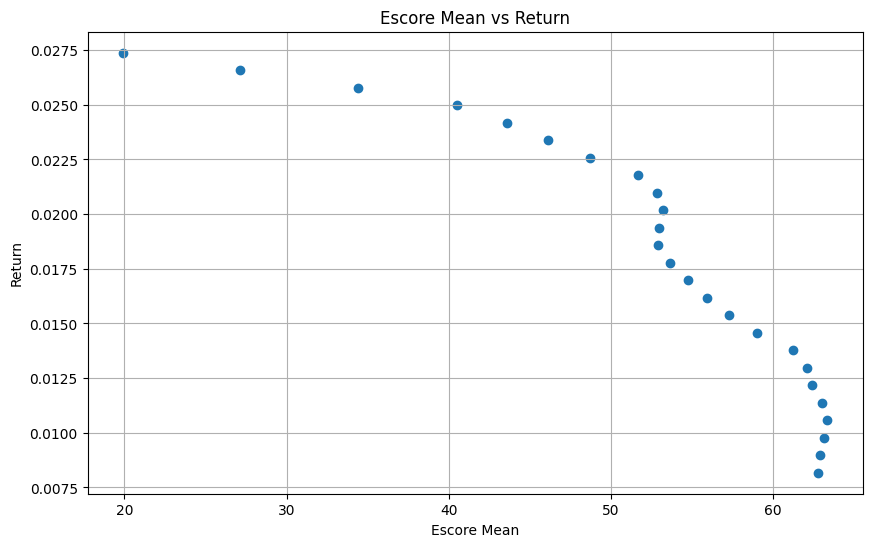

In [1169]:
# Plot in the E score-return space the various portfolios
plt.figure(figsize=(10, 6))
plt.scatter(df_EscoreMean_return['Escore Mean'], df_EscoreMean_return['Return'])
plt.title('Escore Mean vs Return')
plt.xlabel('Escore Mean')
plt.ylabel('Return')
plt.grid(True)
plt.show()